<a href="https://colab.research.google.com/github/RiteshopShrivastava/Decision_tree/blob/main/Assignment_DecisionTree_Fraud_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

**Data Description :**

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [38]:
fraud_df = pd.read_csv('/content/Fraud_check.csv')
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [39]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [40]:
fraud_data= fraud_df

In [42]:
#Label encoding for categorical data
label_encoder = preprocessing.LabelEncoder()
fraud_data['Undergrad']= label_encoder.fit_transform (fraud_data['Undergrad'])
fraud_data['Marital.Status'] =label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])


In [43]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [44]:
#Categorising data based on Taxable income
tax_value =[]
for value in fraud_data['Taxable.Income'] :
  if value <=30000:
    tax_value.append('Risky')
  else :
      tax_value.append('Good')
fraud_data['tax_value']= tax_value

In [45]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [46]:
fraud_data1= fraud_data

In [47]:
#label encoding of 'tax_value' column
fraud_data1['tax_value']= label_encoder.fit_transform(fraud_data1['tax_value'])


In [48]:
fraud_data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [49]:
fraud_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
 6   tax_value        600 non-null    int64
dtypes: int64(7)
memory usage: 32.9 KB


In [50]:
fraud_data2= fraud_data1.drop(['Taxable.Income'], axis=1)

In [51]:
fraud_data2

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [52]:
# Define Independent & dependent variable
x= fraud_data2.iloc[:,0:5]                 #independent variable
y= fraud_data2.iloc[:,5:]                  #dependent variable

In [53]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [54]:
y

,tax_value
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [56]:
# Identifying unique classes
fraud_data2['tax_value'].unique()

array([0, 1])

In [57]:
# count of each class
fraud_data2.tax_value.value_counts()

0    476
1    124
Name: tax_value, dtype: int64

In [58]:
#Preparing Test & Train data set
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=40)

# **Decision Tree Classifier (CART5.0)**

In [114]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'Decision tree using entropy')

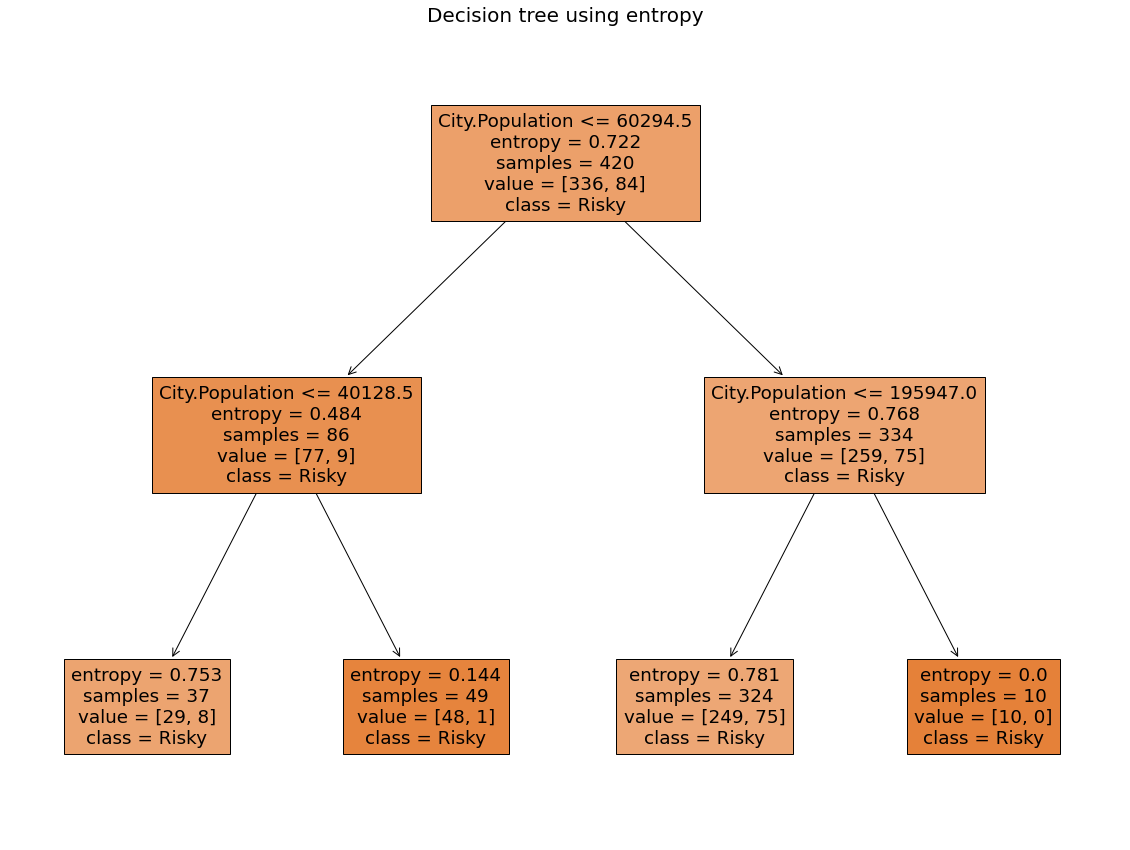

In [115]:
#Visualizing decision tree
fig = plt.figure(figsize=(20,15))
tree.plot_tree(model, feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using entropy', fontsize=20)

In [116]:
# Predicting on test data
pred=model.predict(x_test)
pd.Series(pred).value_counts()

0    180
dtype: int64

In [117]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
prediction= preds.reshape(180,1)
prediction

In [119]:
#Calcualting Accuracy
np.mean(prediction==y_test)

tax_value    0.772222
dtype: float64

**77 % accuracy**

# **Decision Tree Classifier using Gini impurity (CART)**

In [98]:
model1= DecisionTreeClassifier(criterion='gini', max_depth=2)
model1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'Decision tree using Gini criteria')

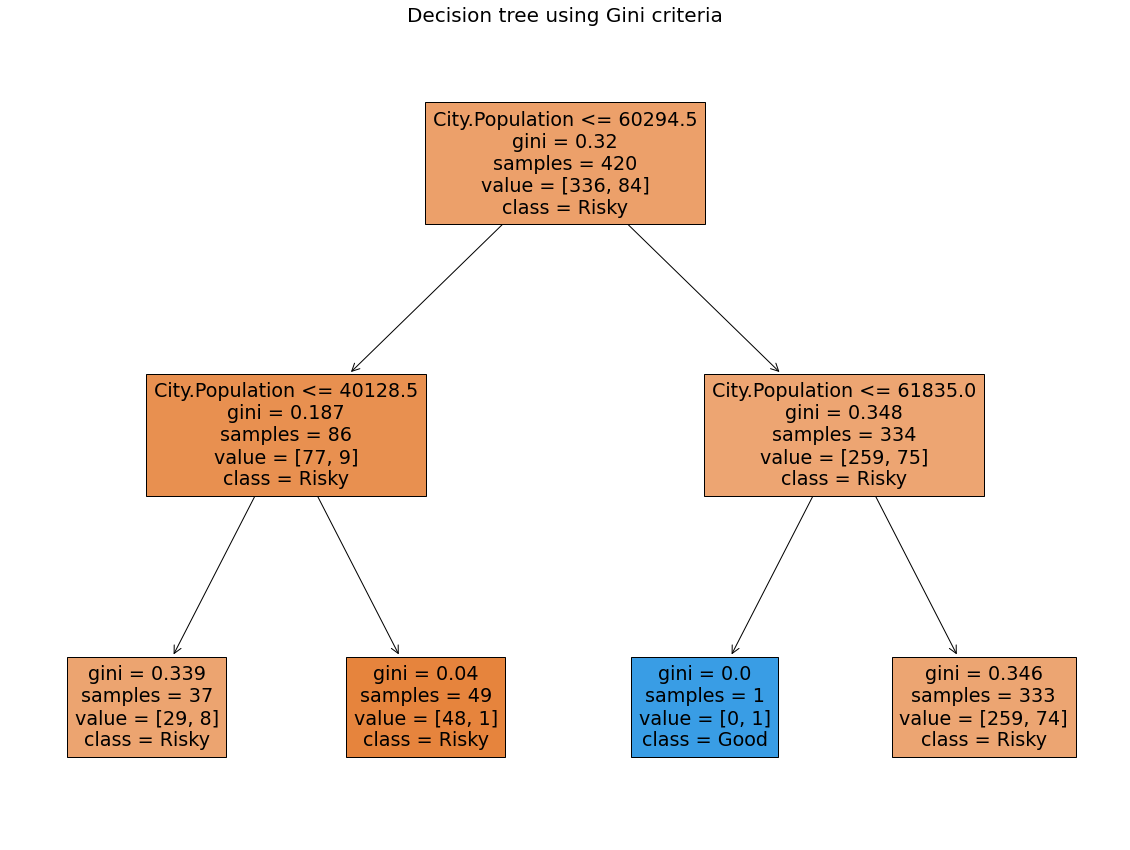

In [103]:
#Visualizing decision tree
figure= plt.figure(figsize=(20,15))
tree.plot_tree(model1, feature_names=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'], class_names=['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini criteria', fontsize=20)

In [110]:
#Predicting values on test data
pred_gini = model1.predict(x_test)
pred_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [112]:
prediction_gini = pred_gini.reshape(180,1)

In [113]:
# calculating accuracy
np.mean(prediction_gini==y_test)

tax_value    0.777778
dtype: float64

**77 % accuracy**